In [1]:
from scipy import stats
import pandas as pd

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import statsmodels

In [4]:
import statsmodels.api as sm

In [5]:
df = pd.read_csv("ab_data.csv")

In [6]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


# Explanatory Data Analysis 

check if there are miss alignments between c/t groups and landing pages design

In [7]:
new_control = len(df[(df['landing_page']=='new_page') & (df['group']=='control')])

In [8]:
new_control

1928

In [9]:
old_treatment =  len(df[(df['landing_page']=='old_page') & (df['group']=='treatment')])

In [10]:
old_treatment

1965

drop miss aligned rows

In [11]:
df = df.drop(df.index[(df['landing_page']=='new_page') & (df['group']=='control')],axis = 0)

In [12]:
df = df.drop(df.index[(df['landing_page']=='old_page') & (df['group']=='treatment')],axis = 0)

In [13]:
df.shape

(290585, 5)

In [14]:
df.isna().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

check the conversion rates

In [15]:
old_page_conversion = len(df[(df['landing_page']=='old_page') & (df['converted']==1)])/len(df[df['landing_page']=='old_page'])

In [16]:
old_page_conversion

0.1203863045004612

In [17]:
new_page_conversion = len(df[(df['landing_page']=='new_page') & (df['converted']==1)])/len(df[df['landing_page']=='new_page'])

In [18]:
new_page_conversion

0.11880724790277405

check if there any duplicates

In [19]:
len(df.user_id.unique())

290584

create df2 with only first record of the duplicate user

In [20]:
df[df.duplicated('user_id') == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [22]:
df2 = df.drop(index = 1899, axis = 0)

In [23]:
df.shape

(290585, 5)

In [24]:
df2.shape

(290584, 5)

The probability to receive treatment

In [25]:
ct_rate = len(df[df['landing_page']=='new_page'])/len(df)

In [26]:
ct_rate

0.5000636646764286

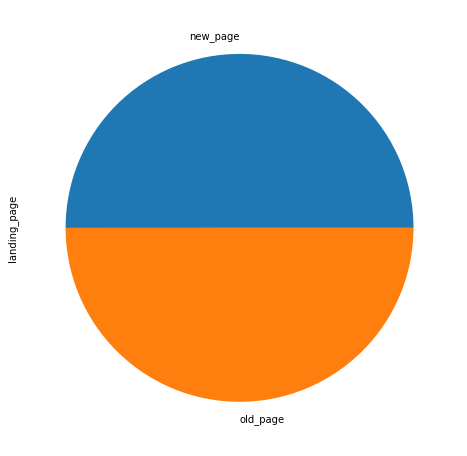

In [27]:
df2['landing_page'].value_counts().plot(kind='pie', figsize=(8,8));

In [28]:
df2['day'] = df2['timestamp'].apply(lambda x:x.split(' ')[0])

In [29]:
df2.head()

,user_id,timestamp,group,landing_page,converted,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


In [30]:
df_cr = df2.groupby(['timestamp'])['converted'].apply(lambda g: g / g.sum()).rename("count")

In [31]:
df_cr.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
Name: count, dtype: float64

In [34]:
df2

,user_id,timestamp,group,landing_page,converted,day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,2017-01-10
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,2017-01-19
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,2017-01-17
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,2017-01-04
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,2017-01-15


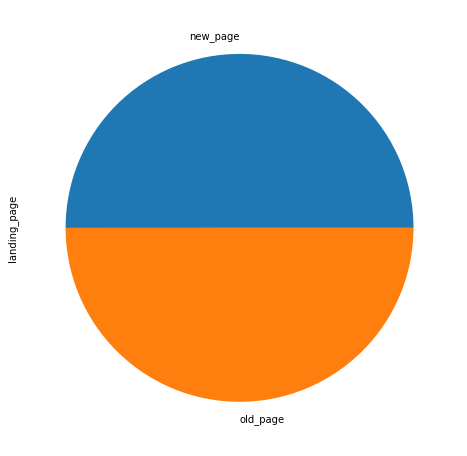

In [35]:
df2['landing_page'].value_counts().plot(kind='pie', figsize=(8,8));

# plt.scatter(df2['day'],  df2['old_rate'], color='green',label='p_old')
# plt.scatter(df2['day'], df2['new_rate'], color='red',label='p_new')
# plt.xlabel('day of January')
# plt.ylabel('conversion rate')
# #plt.ylim(0.11, 0.13)
# plt.legend()
# plt.title('conversion rate at different days of the month');

# A/B Testing 

Null Hypothesis: Conversion(old) >= Conversion(new)

Alternative Hypothesis: Conversion(old) < Conversion(new)

Type I error. A Type I error occurs when the researcher rejects a null hypothesis when it is true. The probability of committing a Type I error is called the significance level. This probability is also called alpha, and is often denoted by α.

Type II error. A Type II error occurs when the researcher fails to reject a null hypothesis that is false. The probability of committing a Type II error is called Beta, and is often denoted by β. The probability of not committing a Type II error is called the Power of the test.

In [36]:
n_new = len(df2[df2['landing_page']=='new_page'])
n_old = len(df2[df2['landing_page']=='old_page'])

In [37]:
count_new = len(df2[(df2['landing_page']=='new_page') & (df2['converted']==1)])
nobs_new = len(df2[df2['landing_page']=='new_page'])
count_old = len(df2[(df2['landing_page']=='old_page') & (df2['converted']==1)])
nobs_old = len(df2[df2['landing_page']=='old_page'])

In [38]:
stat, pval = sm.stats.proportions_ztest([count_new,count_old], [nobs_new,nobs_old], alternative='larger')

In [39]:
pval

0.9050583127590245

In [40]:
from statsmodels.stats.power import TTestIndPower


In [43]:
effect = 0.01
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)


In [44]:
result

156978.1728604922

Since p-value = 0.905 >> alpha = 0.05, the nwe fail to reject null hypothesis, so that we will accept null hypothesis at 0.95 significance level. So the conversion rate of new version is not statistically significant larger than old version's conversion rate.